In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from utils.utilities import fetch_data
from utils.envs import TradingEnv1, TradingEnv4, TradingEnv5
from utils.td3 import Agent

In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
%matplotlib inline

---

In [5]:
data = fetch_data('./data/HistoricalPriceData.db')

In [10]:
env_name = 'TradingEnv1'
file_name = 'TD3_TradingEnv1_42'
seed = 3

In [11]:
env_name = 'TradingEnv5' ###

In [12]:
env = eval(f'{env_name}(data)')
env.seed(seed)
np.random.seed(seed)

In [16]:
env.current_step = 10

In [17]:
state_dim = np.prod(env.observation_space.shape)
action_dim = env.action_space.shape[0]
max_action = float(env.action_space.high[0])

In [19]:
agent = Agent(
    state_dim, 
    action_dim, 
    max_action,
)

#agent.load(file_name, './models')
agent.load('TD3_TradingEnv5_42_200', './models/all_td3') ###

In [20]:
positions = env.positions

In [21]:
actions = []
rewards = []

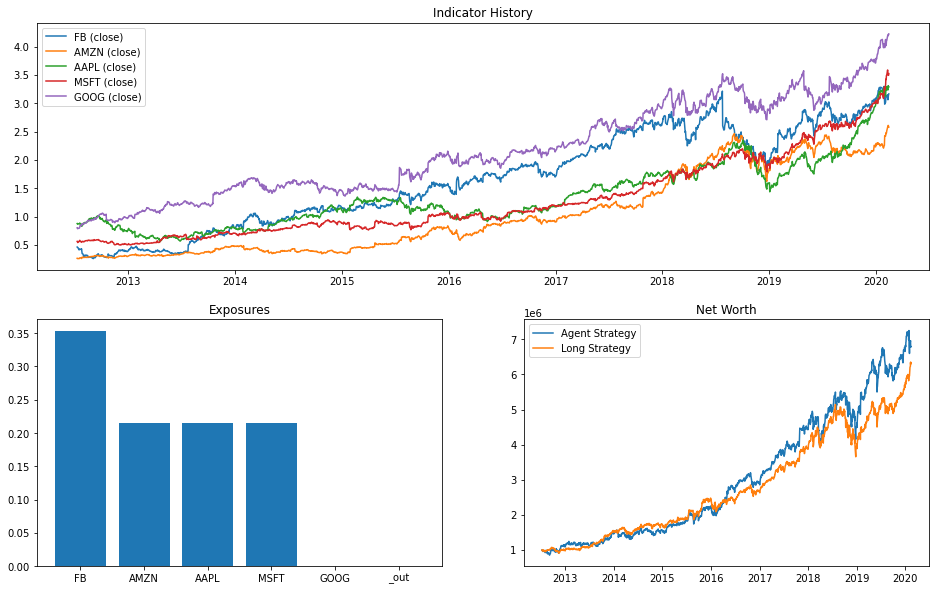

In [22]:
for episode in np.arange(1):

    done = False
    obs = env.reset()

    while not done:
            
        action = agent.select_action(np.array(obs))
        action_fmt = env.format_action(positions, action)

        new_obs, reward, done, info = env.step(action_fmt)

        actions.append(action)
        rewards.append(reward)
        
        obs = new_obs
        
        env.render()
    